# Home Credit Default Risk

### Getting the data

1- Downloading the [complete dataset](https://www.kaggle.com/competitions/home-credit-default-risk/data). 

One row represents one loan in our data sample.
The target variable says wether the loan was repaid (0) or not (1)

2- Loading the training and test datasets

In [ ]:
### Complete in this cell: Loading the dataset
!pip install kaggle
from google.colab import files
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
!pip install matplotlib --upgrade
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
!pip install lightgbm
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import set_config

kaggle_dict = {"username":"gastnoviedo","key":"a8b0ff9a5a82bbe2d9c54401cdba6a53"}

with open('kaggle.json', 'w') as f:
    json.dump(kaggle_dict, f)
    print("New json file is created from data.json file")

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c home-credit-default-risk
!mkdir home-credit-default-risk
!unzip home-credit-default-risk.zip -d home-credit-default-risk

application_train = pd.read_csv('/content/home-credit-default-risk/application_train.csv')
application_test  = pd.read_csv('/content/home-credit-default-risk/application_test.csv')

New json file is created from data.json file
mkdir: cannot create directory ‘/root/.kaggle’: File exists
home-credit-default-risk.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘home-credit-default-risk’: File exists
Archive:  home-credit-default-risk.zip
replace home-credit-default-risk/HomeCredit_columns_description.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace home-credit-default-risk/POS_CASH_balance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace home-credit-default-risk/application_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace home-credit-default-risk/application_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace home-credit-default-risk/bureau.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace home-credit-default-risk/bureau_balance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace home-credit-default-risk/credit_card_balance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
re

### Exploratory Data Analysis

**Dataset Basics**

1- Shape of the training and test datasets.

In [ ]:
### Complete in this cell: shape of the dataset
print(f"Shape of Training Data Set: {application_train.shape}")
print(f"Shape of Testing Data Set : {application_test.shape}")

Shape of Training Data Set: (307511, 122)
Shape of Testing Data Set : (48744, 121)


2- Columns in the train dataset

In [ ]:
print(f"Array with Training Data Set Columns: {application_train.columns.values}")

Array with Training Data Set Columns: ['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 

3- Showing the first 5 records of the training dataset and transposing the dataframe to see each record as a column and features as rows.

In [ ]:
pd.set_option('display.max_rows', None)
application_train_5_records = application_train.head(5)
application_train_5_records.T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5


4- Distribution of the target variable values

Amount of clients with payment difficulties       : 24825
Amount of clients without payment difficulties    : 282686




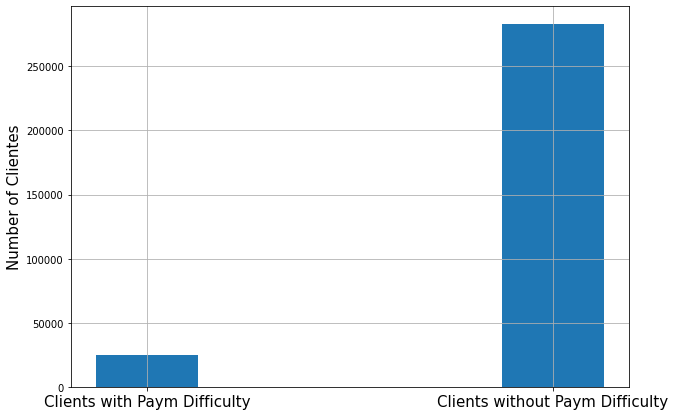



Percentage of clients with payment difficulties   : 8.07 %
Percentage of clients without payment difficulties: 91.93 % 




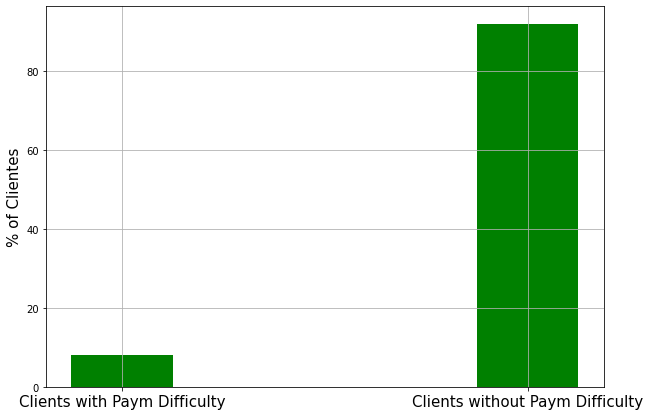

In [ ]:
pd.reset_option('display.max_rows', None)
amt_paym_difficult         = application_train.TARGET.sum()
amt_paym_difficult_perc    = round((amt_paym_difficult/len(application_train))*100,2)
amt_no_paym_difficult      = len(application_train) - amt_paym_difficult
amt_no_paym_difficult_perc = round((amt_no_paym_difficult/len(application_train))*100,2)

print(f"Amount of clients with payment difficulties       : {amt_paym_difficult}")
print(f"Amount of clients without payment difficulties    : {amt_no_paym_difficult}\n\n")

fig, ax = plt.subplots(figsize=(10, 7), facecolor='w')
ax.bar(['Clients with Paym Difficulty', 'Clients without Paym Difficulty'], [amt_paym_difficult,amt_no_paym_difficult], width=0.25, align='center')
ax.tick_params('x', labelsize=15)
ax.grid()
ax.set_ylabel('Number of Clientes', size=15)
plt.show()

print("\n\nPercentage of clients with payment difficulties   :", amt_paym_difficult_perc,"%")
print("Percentage of clients without payment difficulties:", amt_no_paym_difficult_perc,"% \n\n")

fig, ax = plt.subplots(figsize=(10, 7), facecolor='w')
ax.bar(['Clients with Paym Difficulty', 'Clients without Paym Difficulty'], [amt_paym_difficult_perc,amt_no_paym_difficult_perc], width=0.25, align='center', color='g')
ax.tick_params('x', labelsize=15)
ax.grid()
ax.set_ylabel('% of Clientes', size=15)
plt.show()

5- Number of columns of each data type

In [ ]:
### Complete in this cell: show number of columns per data type
print("Number of columns per data type:\n")
print(application_train.dtypes.value_counts())

Number of columns per data type:

float64    65
int64      41
object     16
dtype: int64


6- Number of distinct values in each column (number of labels), for categorical variables

In [ ]:
print("Number of unique values per categorical column: \n")
print(application_train.select_dtypes(include='object').nunique())

Number of unique values per categorical column: 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


7- Analyzing missing data: percentage of missing data for each column ordered by percentage descending (showing only the 20 columns with higher missing pct)

In [ ]:
perc_missing_data_per_column = (application_train.isna().sum()/len(application_train))*100
print("Percentage of missing data for each column (only the 20 columns with higher missing pct):")
perc_missing_data_per_column.sort_values(ascending=False).head(20)

Percentage of missing data for each column (only the 20 columns with higher missing pct):


COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
dtype: float64

**Analyzing distribution of variables**

1- Distribution of credit amounts

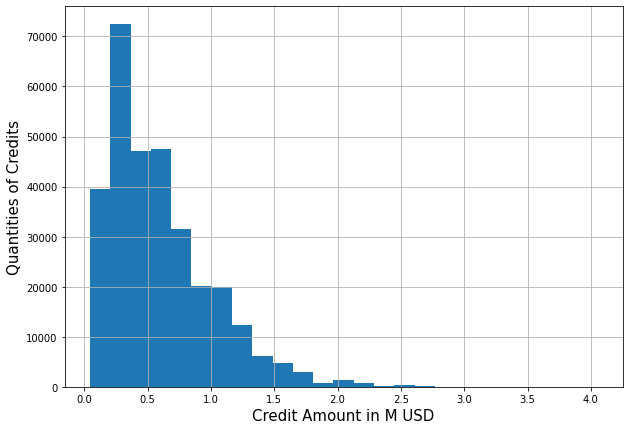

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), facecolor='w')
ax.hist(application_train.AMT_CREDIT/1e6, bins=25)
ax.set_xlabel('Credit Amount in M USD', size=15)
ax.set_ylabel('Quantities of Credits', size=15)
ax.grid()
plt.show()

2- Education level of the credit applicants, percentages of each category. Also printing the total counts for each category.

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


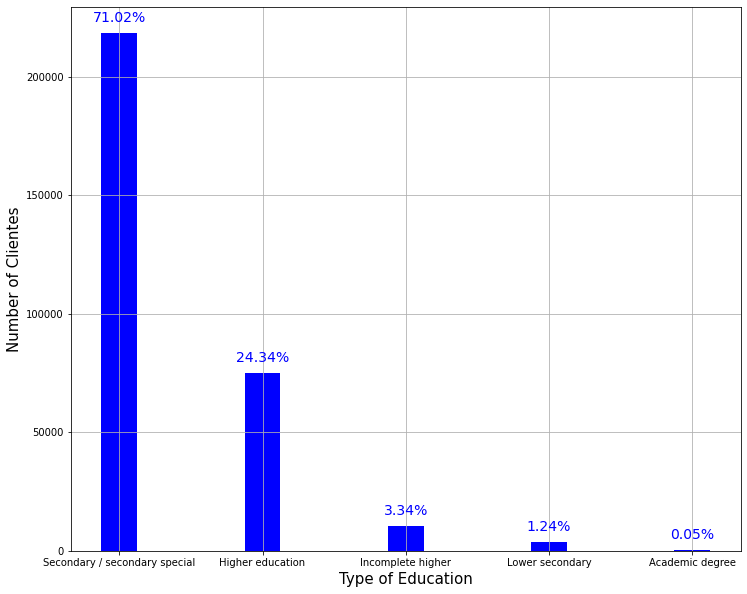

In [ ]:
education_type      = application_train.NAME_EDUCATION_TYPE.value_counts()
education_type_dict = dict(education_type)
education_type_perc = round(education_type/len(application_train)*100,2)
education_type_perc = education_type_perc.apply(lambda x: str(x) + '%')

print(education_type)

fig, ax = plt.subplots(figsize=(12, 10), facecolor='w')
bars_plot = ax.bar(education_type_dict.keys(), education_type_dict.values(), width=0.25, align='center', color='b')
ax.bar_label(bars_plot, labels=education_type_perc, padding=8, color='b', fontsize=14)
ax.grid()
ax.set_ylabel('Number of Clientes', size=15)
ax.set_xlabel('Type of Education', size=15)
plt.show()

3- Distribution of ocupation of the loan applicants

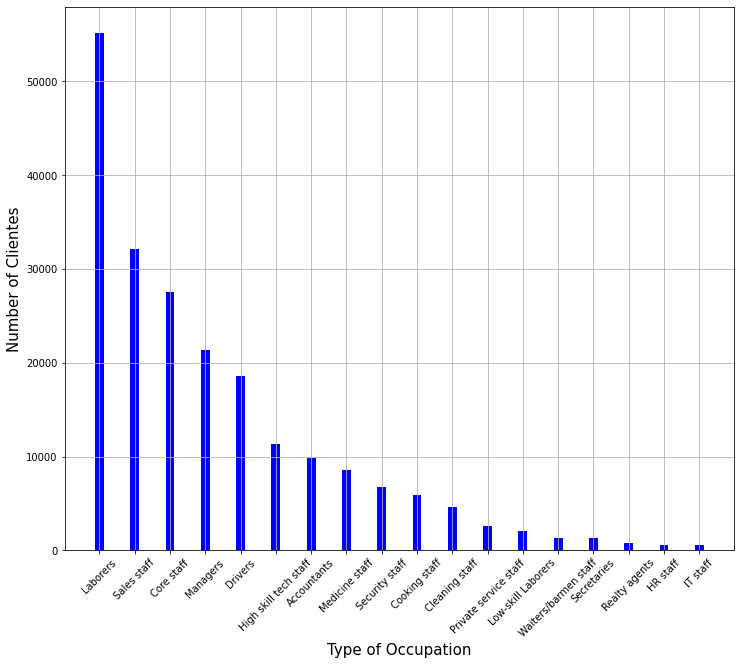

In [ ]:
occupation_type_dict = dict(application_train.OCCUPATION_TYPE.value_counts())
fig, ax = plt.subplots(figsize=(12, 10), facecolor='w')
bars_plot = ax.bar(occupation_type_dict.keys(), occupation_type_dict.values(), width=0.25, align='center', color='b')
ax.tick_params('x', labelrotation=45)
ax.grid()
ax.set_ylabel('Number of Clientes', size=15)
ax.set_xlabel('Type of Occupation', size=15)
plt.show()

4- Family status of the applicants

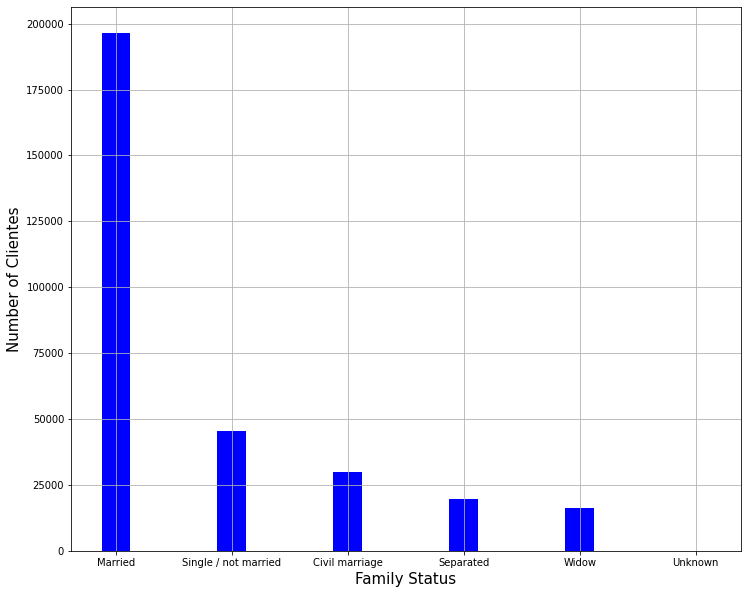

In [ ]:
family_status_dict = dict(application_train.NAME_FAMILY_STATUS.value_counts())
fig, ax = plt.subplots(figsize=(12, 10), facecolor='w')
bars_plot = ax.bar(family_status_dict.keys(), family_status_dict.values(), width=0.25, align='center', color='b')
ax.grid()
ax.set_ylabel('Number of Clientes', size=15)
ax.set_xlabel('Family Status', size=15)
plt.show()

5- Income type of applicants grouped by the target variable

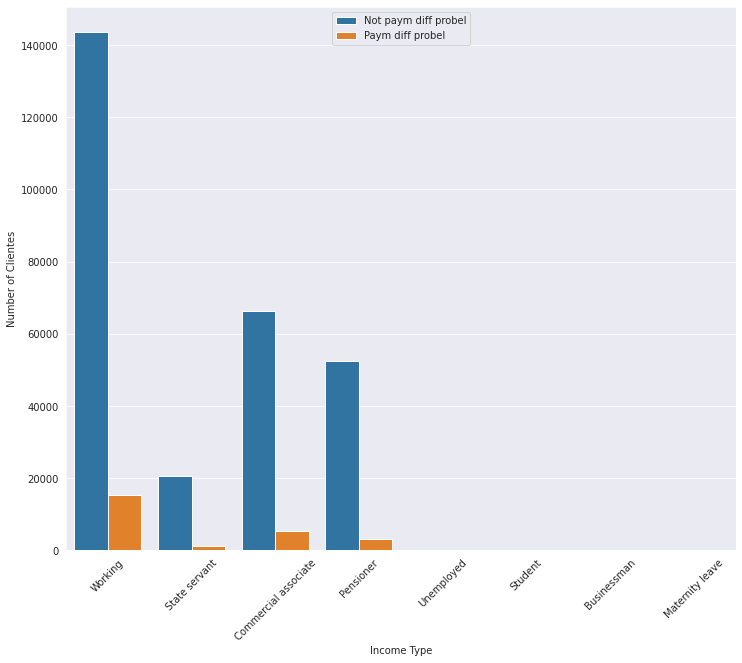

In [ ]:
plt.figure(figsize = (12,10))
sns.countplot(x='NAME_INCOME_TYPE', data=application_train, hue='TARGET')
sns.set_style('darkgrid')
plt.xticks(rotation=45)
plt.xlabel("Income Type")
plt.ylabel("Number of Clientes")
plt.legend(labels=['Not paym diff probel', 'Paym diff probel'])
plt.show()

## Preprocessing

In [ ]:
def encoding(df, columns, enc):
    #This function encodes categorical columns. 
    #It recieves a one hot encoder to perform the encoding.
    encoded_df = enc.transform(df[columns]).toarray()
    encoded_df = pd.DataFrame(encoded_df, columns=enc.get_feature_names_out())
    encoded_df.index = df.index
    encoded_df = pd.concat([encoded_df, df], axis=1)
    encoded_df.drop(columns, axis=1, inplace=True)
    return encoded_df

def pre_processor(data_train, data_test):
    #This function performs the entire pre-processing
    #It saves some features for later usage.
    #Drops useless features
    #Corrects data considered as mistakes (to nan)
    #Clasifies type of columns
    #Imputes features with nan
    #Perfoms standard scaling and one hot encoding

    #Save y_train Target Column
    y_train = data_train.TARGET.copy()
    
    #Save SK_ID_CURR from test data
    data_test_id = data_test.SK_ID_CURR.copy()
    
    #Drop useless features
    data_train.drop('SK_ID_CURR', axis=1, inplace=True)
    data_test.drop('SK_ID_CURR', axis=1, inplace=True)
    
    #Drop Target Column in data train
    data_train.drop('TARGET', axis=1, inplace=True)    
    
    #Errors in Both Data Sets are turn to np.nan
    #DAYS_EMPLOYED >= 0, CODE_GENDER == XNA, are considered as a mistake
    data_train['DAYS_EMPLOYED'] = data_train.DAYS_EMPLOYED.apply(lambda x: np.nan if x>=0 else x)
    data_test['DAYS_EMPLOYED']  = data_test.DAYS_EMPLOYED.apply(lambda x: np.nan if x>=0 else x)
    data_train['CODE_GENDER']   = data_train.CODE_GENDER.apply(lambda x: np.nan if x=='XNA' else x)
    data_test['CODE_GENDER']    = data_test.CODE_GENDER.apply(lambda x: np.nan if x=='XNA' else x)

    #Groups of columns to process
    categoric_columns      = data_train.select_dtypes('object').columns.to_list()
    numeric_columns_all    = data_train.select_dtypes('number').columns.to_list()
    numeric_columns_binary = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
  
    #removing binary columns from numerical columns list
    num_col_not_bin = numeric_columns_all.copy()
    for col in numeric_columns_all:
        if 'FLAG' in col or col in numeric_columns_binary:
            num_col_not_bin.remove(col)
    
    #Imputing
    imputer                         = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer.fit(data_train[categoric_columns])
    data_train_imputed              = imputer.transform(data_train[categoric_columns])
    data_train[categoric_columns]   = pd.DataFrame(data_train_imputed)
    data_test_imputed               = imputer.transform(data_test[categoric_columns])
    data_test[categoric_columns]    = pd.DataFrame(data_test_imputed)
    
    imputer                         = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer.fit(data_train[numeric_columns_all])
    data_train_imputed              = imputer.transform(data_train[numeric_columns_all])
    data_train[numeric_columns_all] = pd.DataFrame(data_train_imputed)
    data_test_imputed               = imputer.transform(data_test[numeric_columns_all])
    data_test[numeric_columns_all]  = pd.DataFrame(data_test_imputed)
    
    #Scaling
    scaler                          = StandardScaler()
    scaler.fit(data_train[num_col_not_bin])
    data_train[num_col_not_bin] = scaler.transform(data_train[num_col_not_bin])
    data_test[num_col_not_bin]  = scaler.transform(data_test[num_col_not_bin])    
    
    #Encoding
    #handle_unknown='ignore', to handle unknown categories during transform.
    #drop='if_binary', to perform binary encoding when a feature has only two categories.
    enc        = OneHotEncoder(handle_unknown='ignore', drop='if_binary')
    enc.fit(data_train[categoric_columns])
    data_train = encoding(data_train, categoric_columns, enc)
    data_test  = encoding(data_test, categoric_columns, enc)       
    
    return data_train.to_numpy(), y_train.to_numpy(), data_test.to_numpy(), data_test_id

In [ ]:
data_train_proc, y_proc, data_test_proc, data_test_proc_id = pre_processor(application_train, application_test)

## Training Models

### Baseline: LogisticRegression

1- Training the baseline model using the preprocesed train data from the previous section, and just default parameters.

In [ ]:
logist_reg = LogisticRegression(random_state=0, max_iter=1000)
logist_reg.fit(data_train_proc,y_proc)

LogisticRegression(max_iter=1000, random_state=0)

2- Using the trained model to predict probabilites for the test data, and then saving the results to a csv in the format expected in the competition: a SK_ID_CURR column and a TARGET column with probabilities.

In [ ]:
predict_proba    = logist_reg.predict_proba(data_test_proc)
predict_proba_df = pd.DataFrame(predict_proba[:,1], columns=['TARGET'])
predict_proba_df = pd.concat([data_test_proc_id, predict_proba_df], axis=1)

predict_proba_df.to_csv('prediction.csv', index=False)

3- Going to the Kaggle competition and loading the csv file.

In [ ]:
!kaggle competitions submit home-credit-default-risk -f prediction.csv -m "Baseline Prediction"

100% 1.26M/1.26M [00:00<00:00, 1.85MB/s]
Successfully submitted to Home Credit Default Risk

 **Private score: 0.73394**

### Training a Random Forest Classifier 

1- Training a RandomForestClassifier, just using the default hyperparameters, except for n_jobs, which is set to "-1" to allow the library to use all CPU cores to speed up training time.

In [ ]:
random_forest_clf = RandomForestClassifier(n_jobs=-1, random_state=0)
start = time.time()
random_forest_clf.fit(data_train_proc,y_proc)
end = time.time()
print('Time to fit the Random Forest model:', end-start)

Time to fit the Random Forest model: 165.1236653327942


2- Using the classifier to predict probabilities on the test set, and saving the results to a csv file.

In [ ]:
ran_for_predict_proba    = random_forest_clf.predict_proba(data_test_proc)
ran_for_predict_proba_df = pd.DataFrame(ran_for_predict_proba[:,1], columns=['TARGET'])
ran_for_predict_proba_df = pd.concat([data_test_proc_id, ran_for_predict_proba_df], axis=1)

ran_for_predict_proba_df.to_csv('ran_for_prediction.csv', index=False)

3- Loading the predictions to the competition.

In [ ]:
!kaggle competitions submit home-credit-default-risk -f ran_for_prediction.csv -m "Random Forest by default Prediction"

100% 567k/567k [00:00<00:00, 1.10MB/s]
Successfully submitted to Home Credit Default Risk

**Private score: 0.69572**

### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here we selected a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

1- Using RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models is "roc_auc".

In [ ]:
random_forest_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

example_hyperparameter_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200]
}

#4 fits just for deploy the notebook. In development phase, a way more fits were tested
rand_search = RandomizedSearchCV(random_forest_clf, example_hyperparameter_grid, random_state=29, n_iter=2, cv=2, scoring='roc_auc', verbose=1)
rand_search.fit(data_train_proc,y_proc)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                   n_iter=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=29, scoring='roc_auc', verbose=1)

2- Using the classifier to predict probabilities on the test set, and saving the results to a csv file.

In [ ]:
rand_search_predict_proba    = rand_search.predict_proba(data_test_proc)
rand_search_predict_proba_df = pd.DataFrame(rand_search_predict_proba[:,1], columns=['TARGET'])
rand_search_predict_proba_df = pd.concat([data_test_proc_id, rand_search_predict_proba_df], axis=1)

rand_search_predict_proba_df.to_csv('rand_search_prediction.csv', index=False)

3- Loading the predictions to the competition.

In [ ]:
!kaggle competitions submit home-credit-default-risk -f rand_search_prediction.csv -m "Random Search Random Forest Prediction"

100% 1.25M/1.25M [00:00<00:00, 2.16MB/s]
Successfully submitted to Home Credit Default Risk

**Private score: 0.72082**

### Training a LightGBM model 

In [ ]:
lgbm = lgb.LGBMClassifier()

lgbm_hyperparameters = {
    'num_leaves':[20,40,60,80,100],
    'min_child_samples':[5,10,15],
    'max_depth':[-1,5,10,20],
    'learning_rate':[0.05,0.1,0.2],
    'reg_alpha':[0,0.01,0.03]
}

#15 fits just for deploy the notebook. In deployment phase, more fits were tested
lgbm_rand_search = RandomizedSearchCV(lgbm, lgbm_hyperparameters, random_state=29, n_iter=5, cv=3, scoring='roc_auc', verbose=1)
lgbm_rand_search.fit(data_train_proc,y_proc)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [-1, 5, 10, 20],
                                        'min_child_samples': [5, 10, 15],
                                        'num_leaves': [20, 40, 60, 80, 100],
                                        'reg_alpha': [0, 0.01, 0.03]},
                   random_state=29, scoring='roc_auc', verbose=1)

In [ ]:
lgbm_predict_proba    = lgbm_rand_search.predict_proba(data_test_proc)

lgbm_predict_proba_df = pd.DataFrame(lgbm_predict_proba[:,1], columns=['TARGET'])
lgbm_predict_proba_df = pd.concat([data_test_proc_id, lgbm_predict_proba_df], axis=1)

lgbm_predict_proba_df.to_csv('lgbm_prediction.csv', index=False)

In [ ]:
!kaggle competitions submit home-credit-default-risk -f lgbm_prediction.csv -m "Random Search LGBM Prediction"

100% 1.26M/1.26M [00:00<00:00, 2.11MB/s]
Successfully submitted to Home Credit Default Risk

**Private score: 0.74292**

### Using Scikit Learn Pipelines 

In [ ]:
data_train = pd.read_csv('/content/home-credit-default-risk/application_train.csv')
data_test  = pd.read_csv('/content/home-credit-default-risk/application_test.csv')

#Save y_train Target Column
data_train_target = data_train.TARGET.copy()
    
#Save SK_ID_CURR from test data
data_test_id = data_test.SK_ID_CURR.copy()
    
#Drop useless features
data_train.drop('SK_ID_CURR', axis=1, inplace=True)
data_test.drop('SK_ID_CURR', axis=1, inplace=True)
    
#Drop Target Column in data train
data_train.drop('TARGET', axis=1, inplace=True)    
    
#Errors in Both Data Sets are turn to np.nan
#DAYS_EMPLOYED >= 0, CODE_GENDER == XNA, are considered as a mistake
data_train['DAYS_EMPLOYED'] = data_train.DAYS_EMPLOYED.apply(lambda x: np.nan if x>=0 else x)
data_test['DAYS_EMPLOYED']  = data_test.DAYS_EMPLOYED.apply(lambda x: np.nan if x>=0 else x)
data_train['CODE_GENDER']   = data_train.CODE_GENDER.apply(lambda x: np.nan if x=='XNA' else x)
data_test['CODE_GENDER']    = data_test.CODE_GENDER.apply(lambda x: np.nan if x=='XNA' else x)

#train_test_split to split the full dataset with stratify to keep the proportion of the target in the remain data.
#The idea is to only use a small percentage of the dataset to feed the pipeline that's why test_size is so big (discarded part).
X_train, data_ft_discard, y_train, data_t_discard = train_test_split(data_train, data_train_target, test_size=0.70, random_state=42, stratify=data_train_target)

categoric_columns      = X_train.select_dtypes('object').columns.to_list()
numeric_columns_all    = X_train.select_dtypes('number').columns.to_list()
numeric_columns_binary = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
 
#removing binary columns from numerical columns list
num_col_not_bin = numeric_columns_all.copy()
for col in numeric_columns_all:
  if 'FLAG' in col or col in numeric_columns_binary:
    num_col_not_bin.remove(col)
  if 'FLAG' in col:
    numeric_columns_binary.append(col)


In [ ]:
# Pipeline for numeric binaries features (such as FLAGS)
numeric_binary_pl = Pipeline(steps=[
    ('impute', SimpleImputer(missing_values=np.nan, strategy='median'))    
])

# Pipeline for numeric non binaries features (such as AMT)
numeric_non_binary_pl = Pipeline(steps=[
    ('impute', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scale' , StandardScaler())
])

# Pipeline for categorical features
categoric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))    
])

# Merging pipelines into one single pre-processing object
full_processor = ColumnTransformer(transformers=[
    ('number_bin'    , numeric_binary_pl    , numeric_columns_binary),
    ('number_non_bin', numeric_non_binary_pl, num_col_not_bin),
    ('categoric'     , categoric_pipeline   , categoric_columns)
])

example_hyperparameter_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4, 8],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 100, 200]
}

# Merging full pre-processer with RandomizedSearchCV
lr_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', RandomizedSearchCV(random_forest_clf, example_hyperparameter_grid, random_state=29, n_iter=10, cv=2, scoring='roc_auc', verbose=1))
])

lr_pipeline.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number_bin',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['REG_REGION_NOT_LIVE_REGION',
                                                   'REG_REGION_NOT_WORK_REGION',
                                                   'LIVE_REGION_NOT_WORK_REGION',
                                                   'REG_CITY_NOT_LIVE_CITY',
                                                   'REG_CITY_NOT_WORK_CITY',
                                                   'LIVE_CITY_NOT_WORK_CITY',
                                                   'FLAG_MOBIL',
                                                   'FLAG_EMP_PHONE',
                                                   'FLAG_WORK_PHONE'...
                                          

In [ ]:
set_config(display="diagram")
lr_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number_bin',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['REG_REGION_NOT_LIVE_REGION',
                                                   'REG_REGION_NOT_WORK_REGION',
                                                   'LIVE_REGION_NOT_WORK_REGION',
                                                   'REG_CITY_NOT_LIVE_CITY',
                                                   'REG_CITY_NOT_WORK_CITY',
                                                   'LIVE_CITY_NOT_WORK_CITY',
                                                   'FLAG_MOBIL',
                                                   'FLAG_EMP_PHONE',
                                                   'FLAG_WORK_PHONE'...
                                                   'EMERGENCYSTATE_MODE'])])),
                ('model',
                 RandomizedSearchCV(cv=2,
                                    estimator=RandomForestClassifier(n_jobs=-1,
                                                                     random_state=0),
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [10, 50,
                                                                       100,
                                                                       None],
                                                         'max_features': ['auto',
                                                                          'sqrt'],
                                                         'min_samples_leaf': [2,
                                                                              4,
                                                                              8],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [10,
                                                                          100,
                                                                          200]},
                                    random_state=29, scoring='roc_auc',
                                    verbose=1))])

In [ ]:
pl_rf_predict_proba = lr_pipeline.predict_proba(data_test)

pl_rf_predict_proba_df = pd.DataFrame(pl_rf_predict_proba[:,1], columns=['TARGET'])
pl_rf_predict_proba_df = pd.concat([data_test_id, pl_rf_predict_proba_df], axis=1)

pl_rf_predict_proba_df.to_csv('pl_rf_prediction.csv', index=False)

In [ ]:
!kaggle competitions submit home-credit-default-risk -f pl_rf_prediction.csv -m "Pipeline with Random Search - Random Forest"

100% 1.26M/1.26M [00:00<00:00, 2.33MB/s]
Successfully submitted to Home Credit Default Risk

**Private score: 0.71916**